In [1]:
%run -n main.py
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
jobs = jobs_manager()

In [2]:
%run -n main.py
hubs = list(list_hubs())

In [3]:
# cache = set(list_html_cache())
# urls = [_ for _ in list_hub_urls(hubs) if _ not in cache]
# %job fetch_urls(log_progress(urls, every=1))

In [4]:
%run -n main.py
# urls = list(list_hub_urls(hubs))
# posts = list(load_raw_posts(log_progress(urls, every=1)))
# dump_posts(posts)
posts = list(unique_posts(load_posts()))

In [33]:
data = []
for post in posts:
    votes = post.votes
    hubs = len(post.hubs)
    company = bool(post.company)
    data.append((post.date, post.views, votes.up, votes.down, votes.value, post.stars, post.comments, hubs, company))
table = pd.DataFrame(data, columns=['date', 'views', 'up', 'down', 'votes', 'stars', 'comments', 'hubs', 'company'])

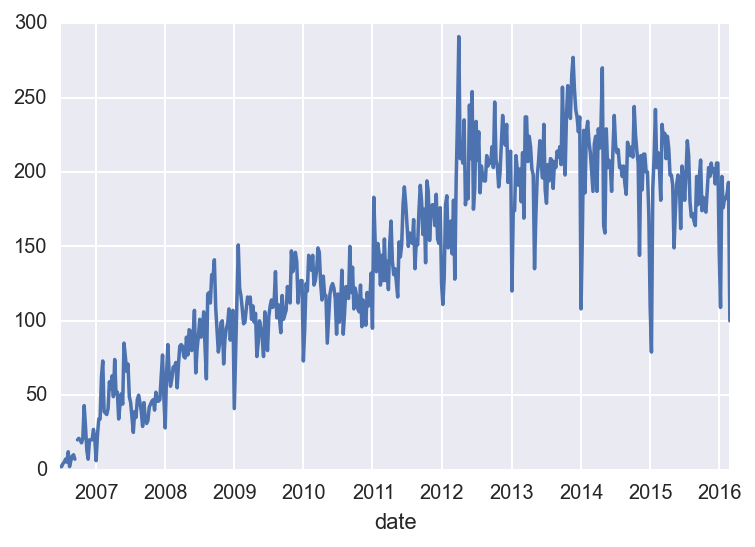

In [6]:
view = table.groupby('date').date.count()
view.resample('w', how='sum').plot()

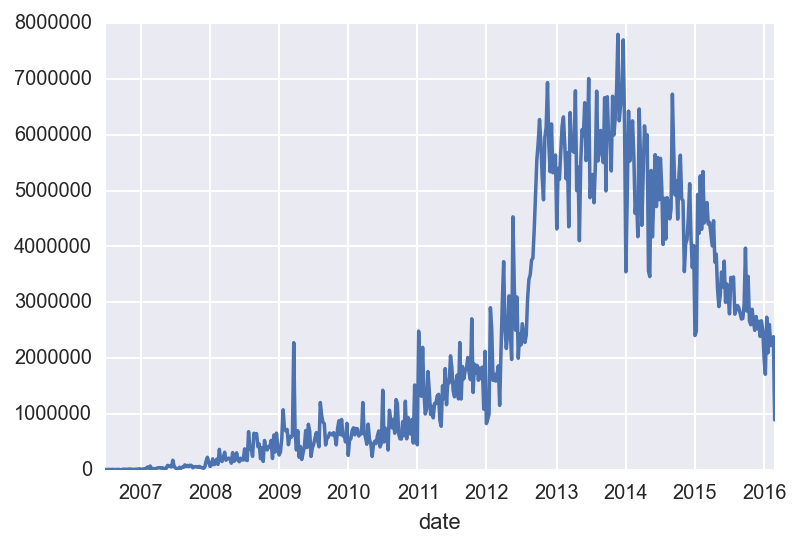

In [7]:
view = table.groupby('date').views.sum()
view.resample('w', how='sum').plot()

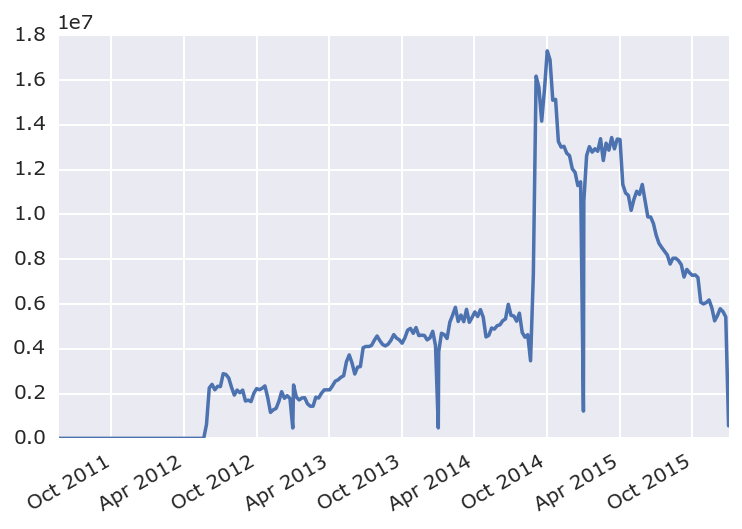

In [14]:
%run -n main.py
# series = pd.Series(download_habr_similarweb_visits())
# pd.DataFrame({'visits': series}).to_excel(SIMILARWEB_HABR)
series = pd.read_excel(SIMILARWEB_HABR).visits
series.plot()

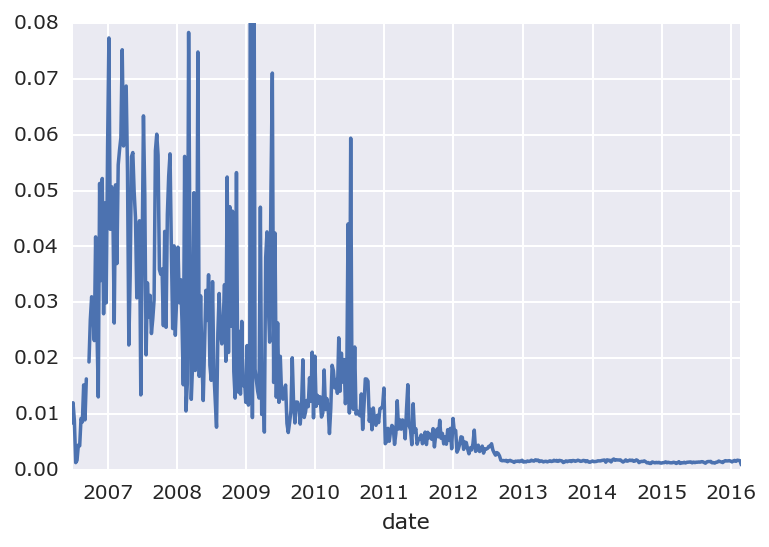

In [36]:
view = table.groupby('date')['views', 'up'].sum()
view = view.up / view.views
view.resample('w', how='mean').plot(ylim=(0, 0.08))

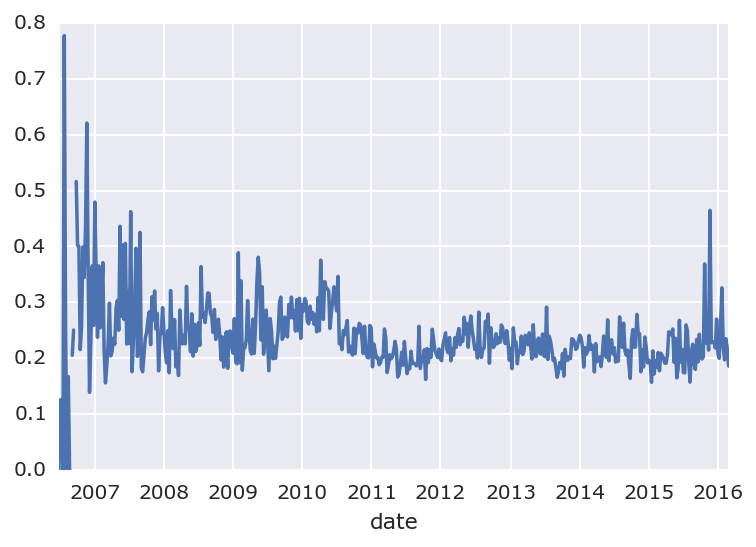

In [25]:
view = table.groupby('date')['up', 'down'].sum()
view = view.down / view.up
view.resample('w', how='mean').plot()

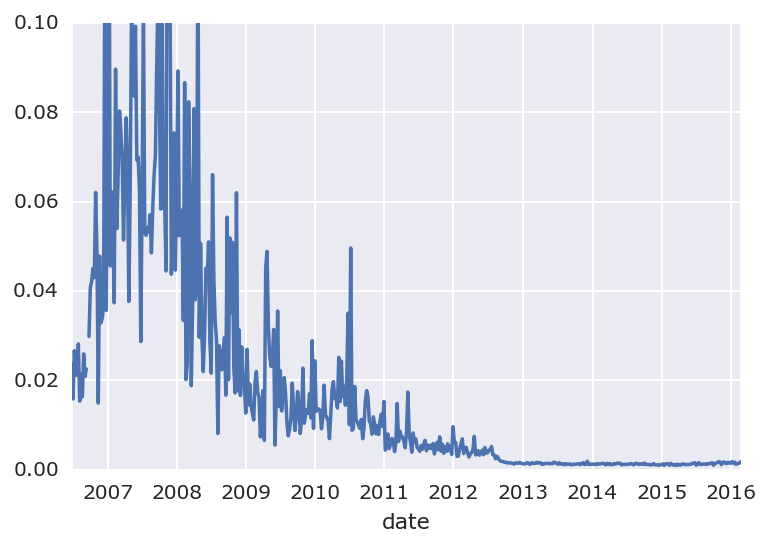

In [37]:
view = table.groupby('date')['views', 'comments'].sum()
view = view.comments / view.views
view.resample('w', how='mean').plot(ylim=(0, 0.1))

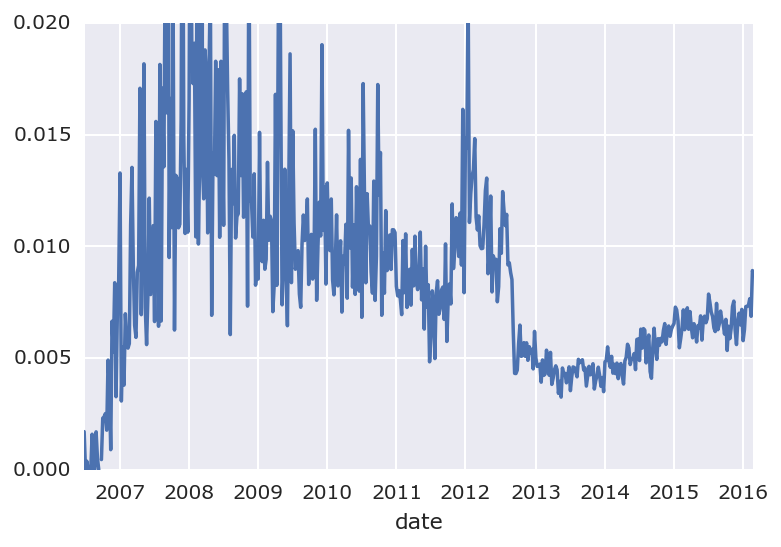

In [16]:
view = table.groupby('date')['views', 'stars'].sum()
view = view.stars / view.views
view.resample('w', how='mean').plot(ylim=(0, 0.02))

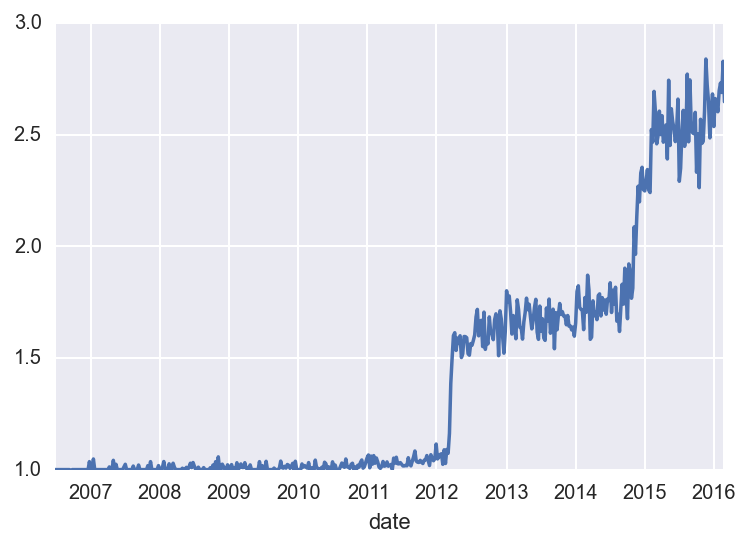

In [11]:
view = table.groupby('date').hubs.mean()
view.resample('w', how='mean').plot()

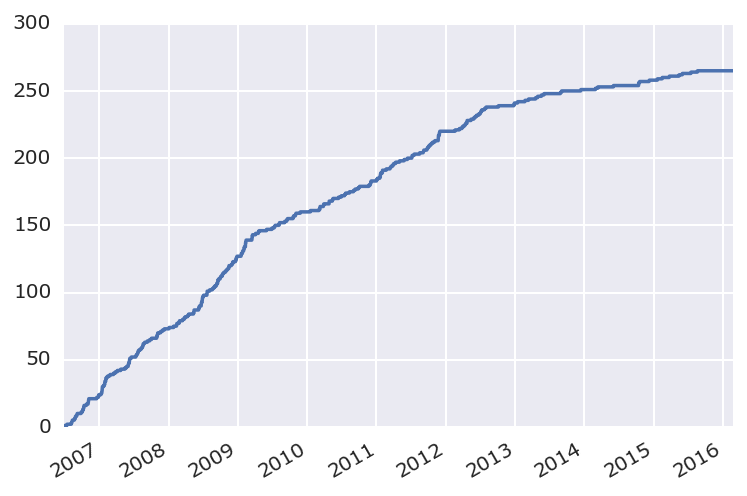

In [20]:
series = {}
hubs = set()
for post in sorted([_ for _ in posts if _.date], key=lambda _: _.date):
    for hub in post.hubs:
        hubs.add(hub)
    series[post.date] = len(hubs)
pd.Series(series).plot()

/Users/alexkuk/envs/mypy/lib/python2.7/site-packages/pandas/core/index.py:4281: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return np.sum(name == np.asarray(self.names)) > 1


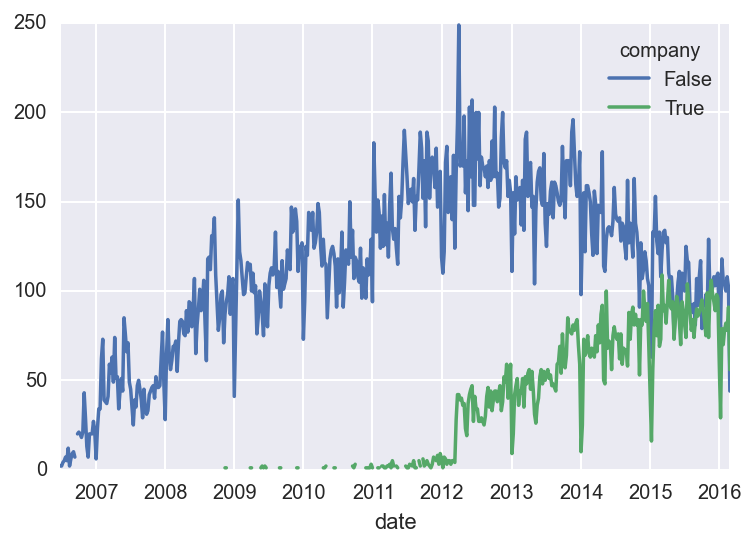

In [12]:
view = table.groupby(['date', 'company']).date.size()
view = view.unstack()
view.resample('w', how='sum').plot()

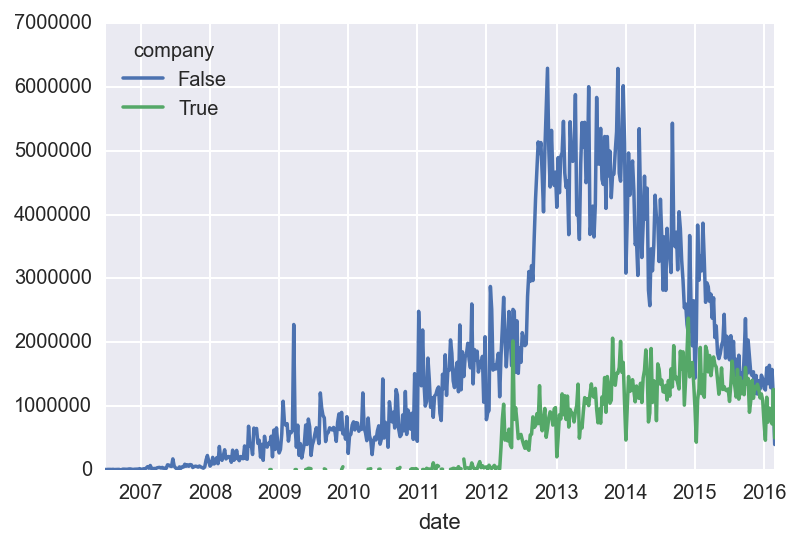

In [13]:
view = table.groupby(['date', 'company']).views.sum()
view = view.unstack()
view.resample('w', how='sum').plot()

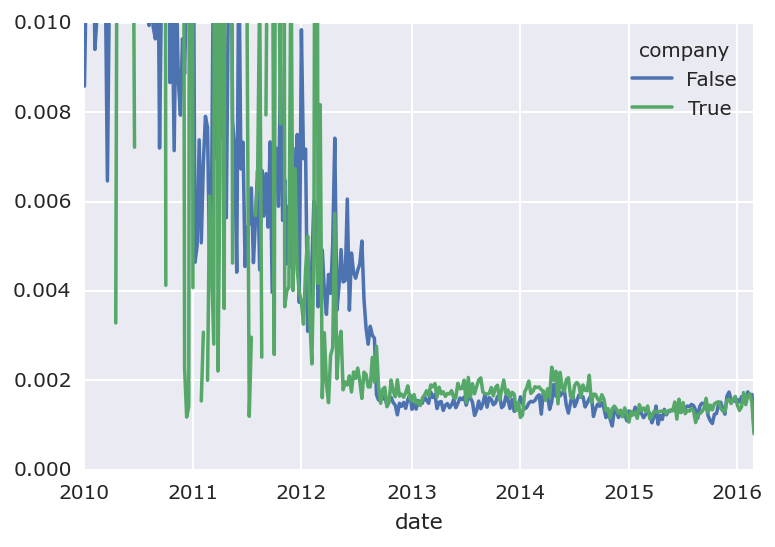

In [25]:
view = table.groupby(['date', 'company'])[['views', 'up']].sum()
view = view.up / view.views
view = view.unstack()
view = view[view.index > pd.to_datetime('2010-01-01')]
view.resample('w', how='mean').plot(ylim=(0, 0.01))

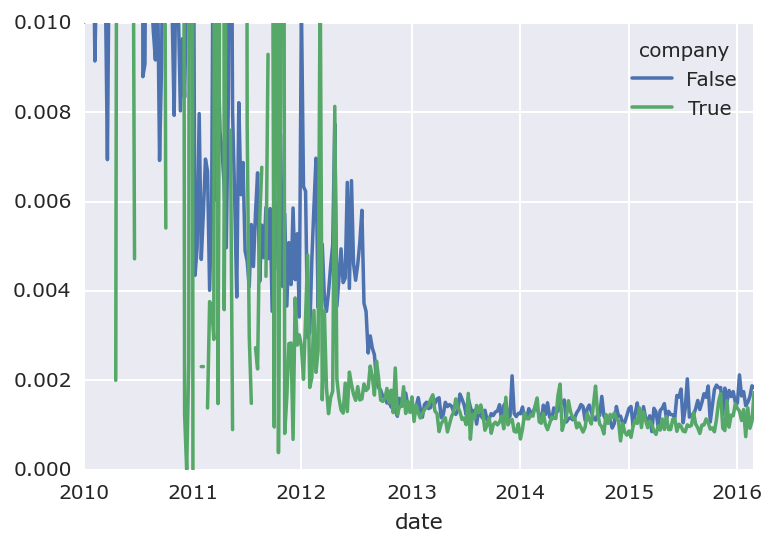

In [26]:
view = table.groupby(['date', 'company'])[['views', 'comments']].sum()
view = view.comments / view.views
view = view.unstack()
view = view[view.index > pd.to_datetime('2010-01-01')]
view.resample('w', how='mean').plot(ylim=(0, 0.01))

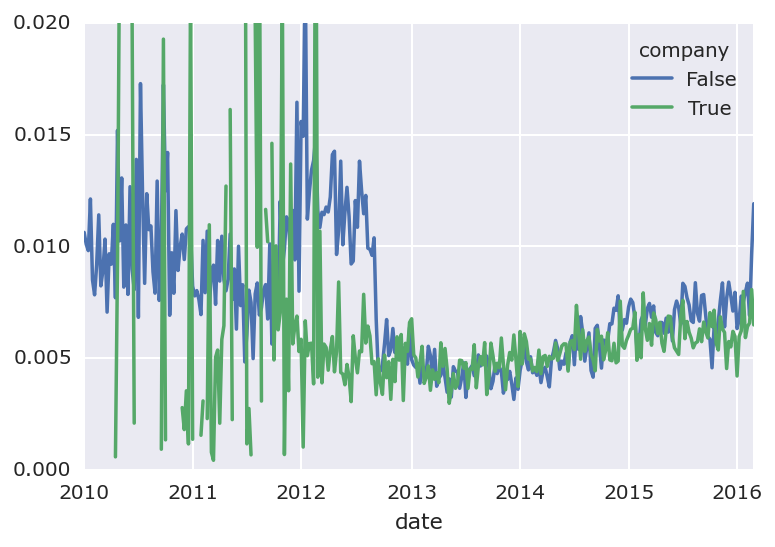

In [29]:
view = table.groupby(['date', 'company'])[['views', 'stars']].sum()
view = view.stars / view.views
view = view.unstack()
view = view[view.index > pd.to_datetime('2010-01-01')]
view.resample('w', how='mean').plot(ylim=(0, 0.02))

In [30]:
data = []
for post in posts:
    for hub in post.hubs:
        data.append((post.url, post.date, post.views, post.comments, hub, bool(post.company)))
table = pd.DataFrame(data, columns=['url', 'date', 'views', 'comments', 'hub', 'company'])

In [31]:
view = table[
    (table.date > pd.to_datetime('2015-01-01'))
    & (table.date < pd.to_datetime('2016-01-01'))
]
view = view.groupby('hub').views.sum()
view = view.sort_values(ascending=False)
top_hubs = view[:60].index

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1446745d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x15276b550>]], dtype=object)

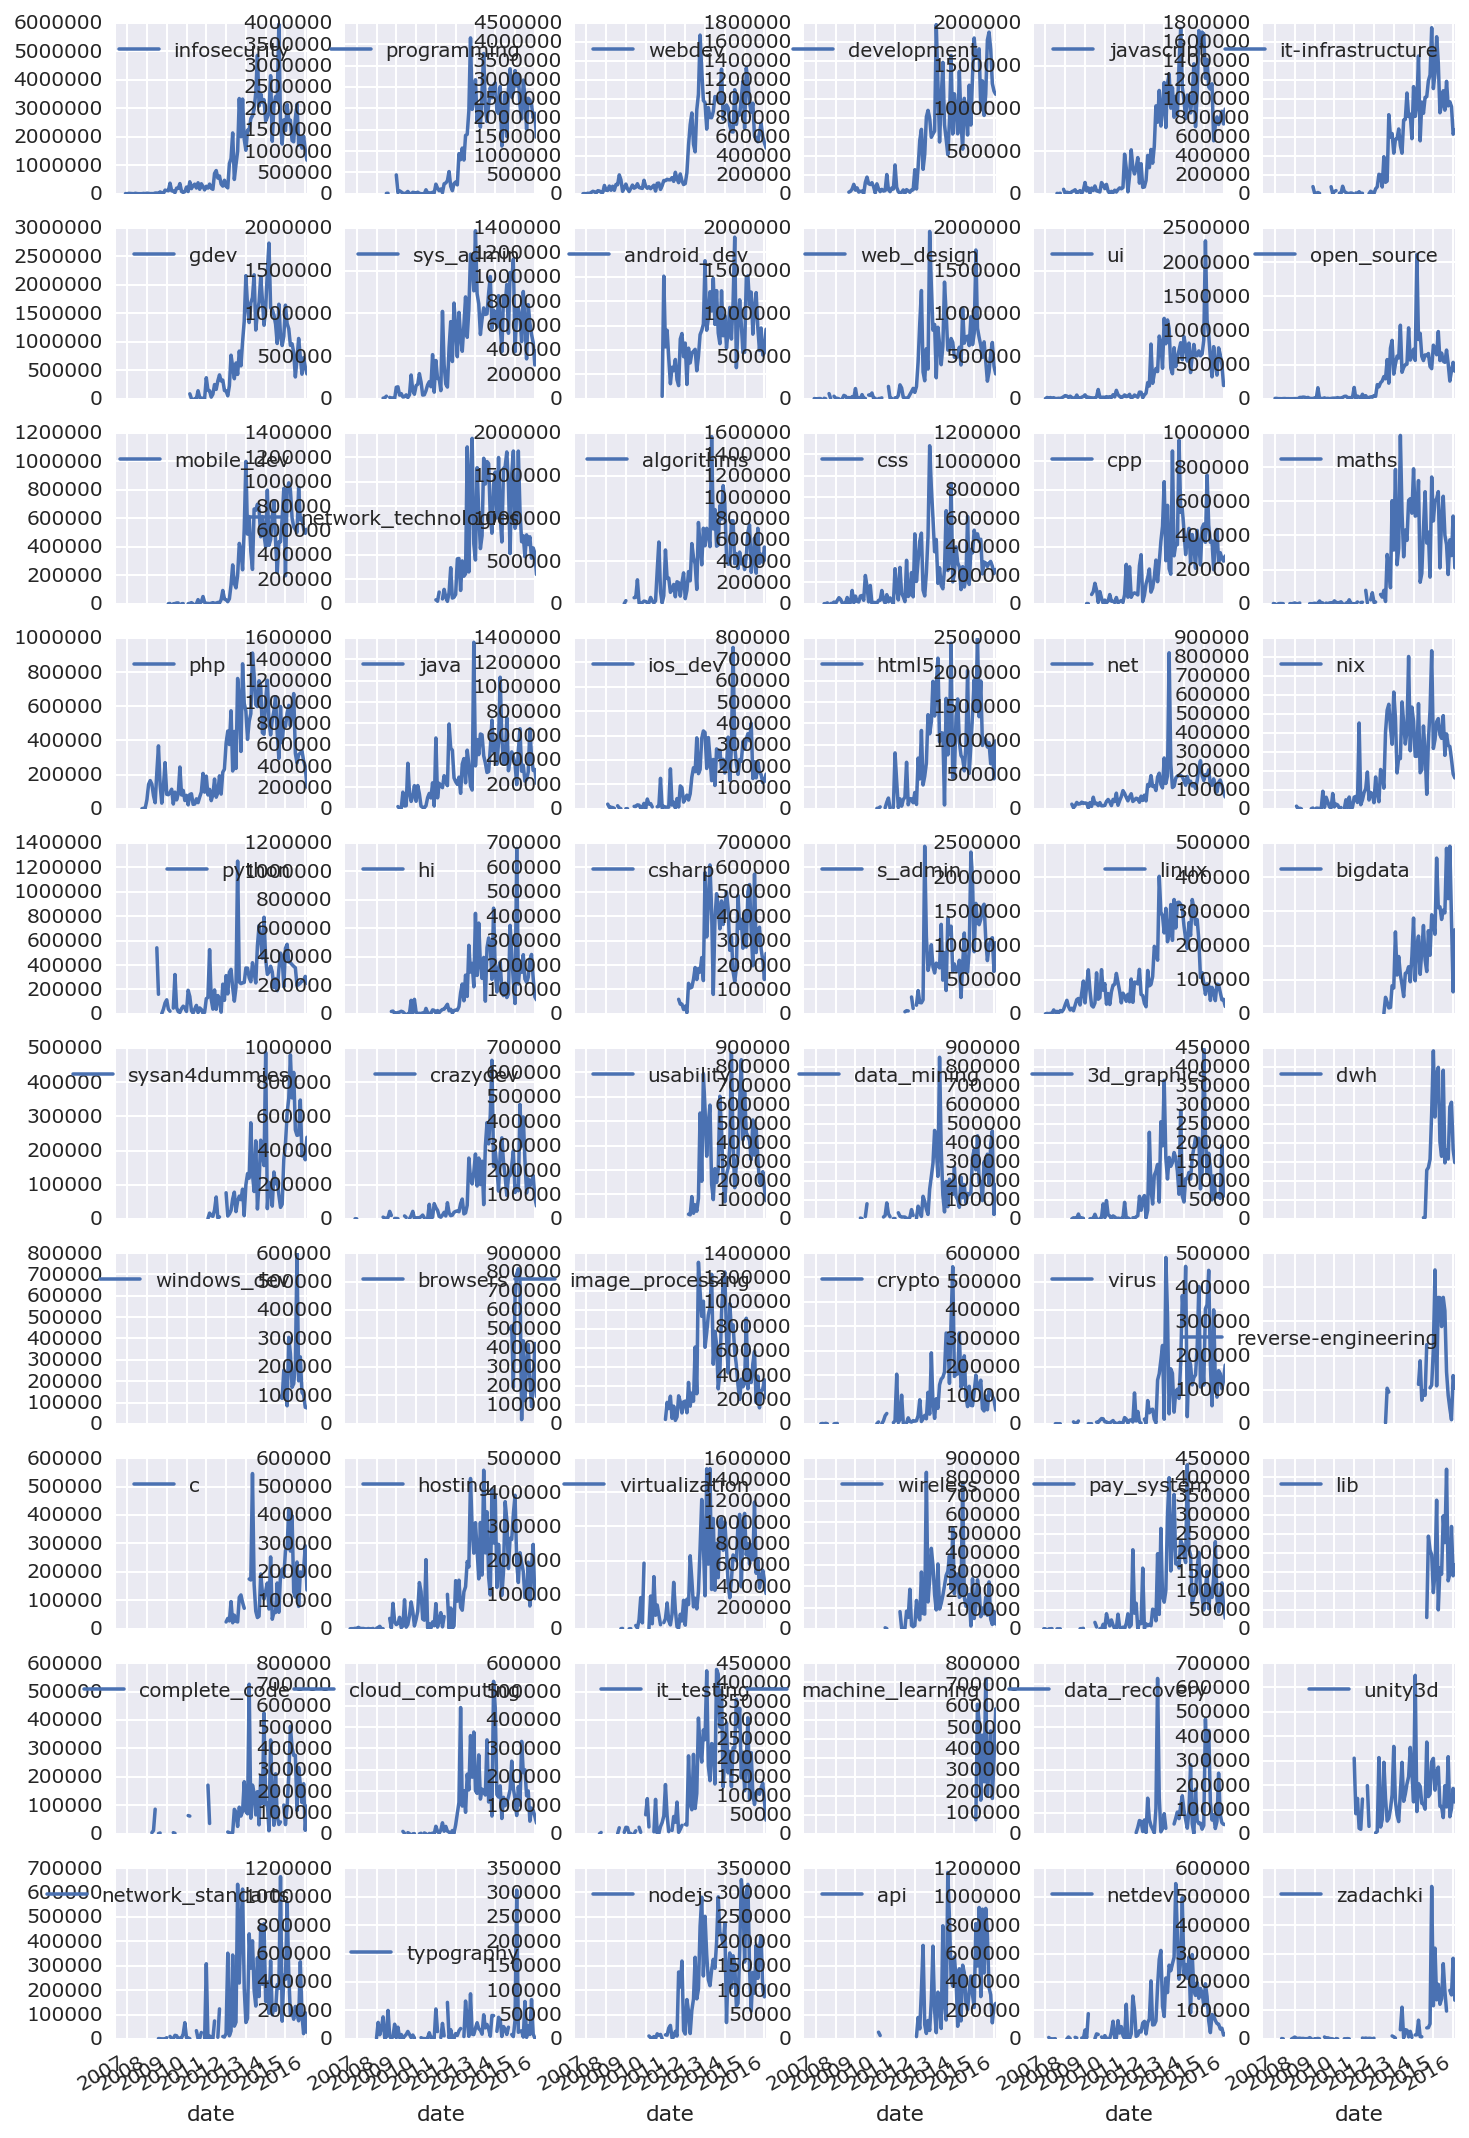

In [73]:
view = table.groupby(['date', 'hub']).views.sum()
view = view.unstack()
view = view.resample('M', how='sum')
view = view.reindex(columns=top_hubs)
view.plot(color=BLUE, subplots=True, layout=(-1, 6), figsize=(12, 20))

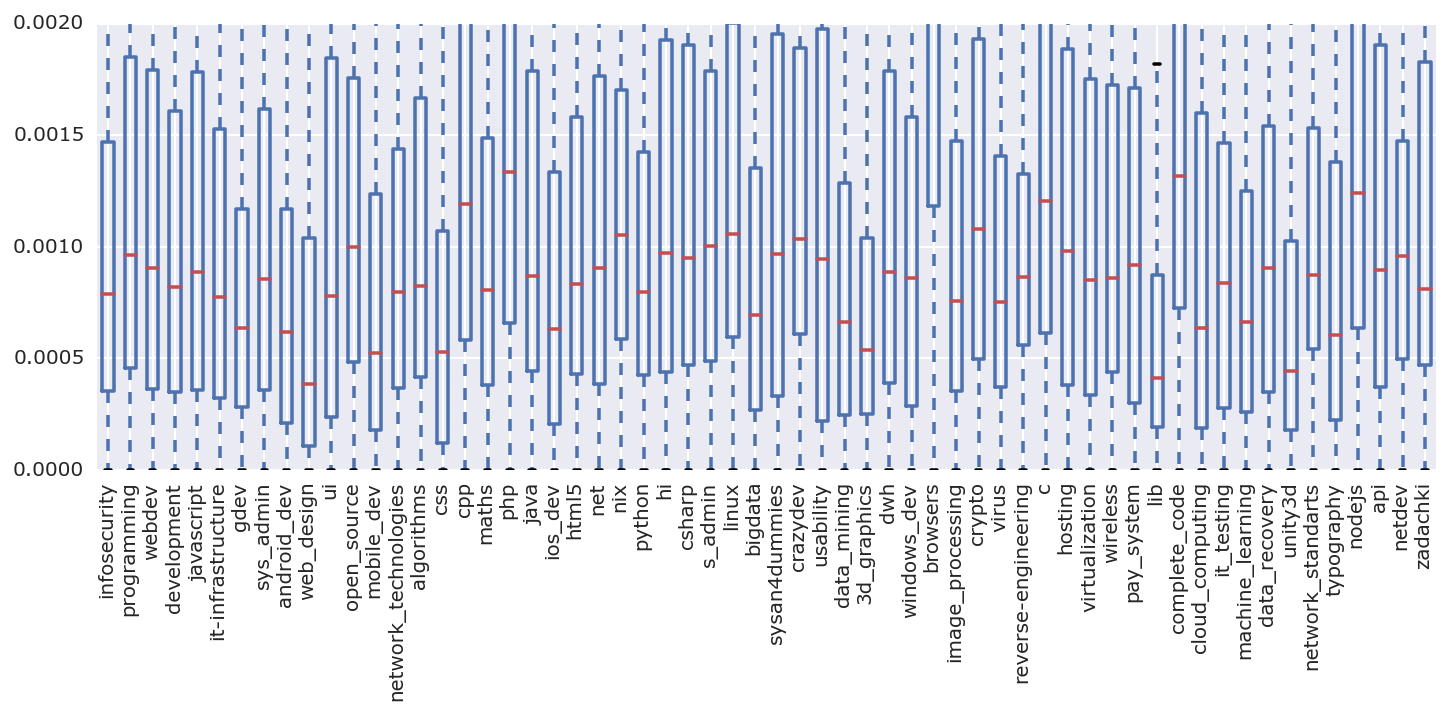

In [32]:
view = table[table.date > pd.to_datetime('2015-01-01')]
view = view.groupby(['url', 'hub'])[['views', 'comments']].sum()
view = view.comments / view.views
view = view.unstack()
view = view.reindex(columns=top_hubs)
fig, ax = plt.subplots()
view.plot(kind='box', ylim=(0, 0.002), ax=ax, figsize=(12, 4))
ax.set_xticklabels(top_hubs, rotation=90)

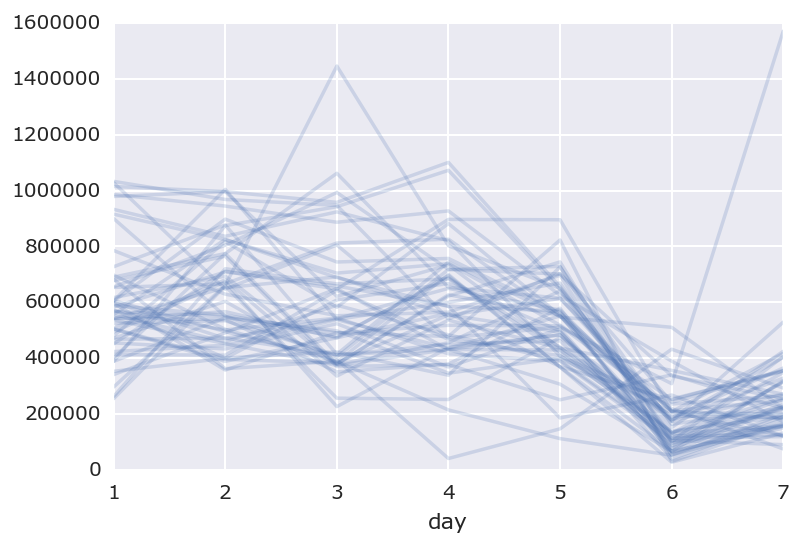

In [73]:
data = []
for post in posts:
    date = post.date
    if date:
        year, week, day = post.date.isocalendar()
        if year == 2015:
            data.append((week, day, post.views))
table = pd.DataFrame(data, columns=['week', 'day', 'views'])
view = table.groupby(['week', 'day']).views.sum()
view = view.unstack()
view.T.plot(legend=False, color=BLUE, alpha=0.2)